In [210]:
#Importing the data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [211]:
# Read Data

bikesharing= pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [212]:
# Finding number of rows a d colums

bikesharing.shape

(730, 16)

In [213]:
# Checking if null values are present

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [214]:
# Checking for numerical columns

bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


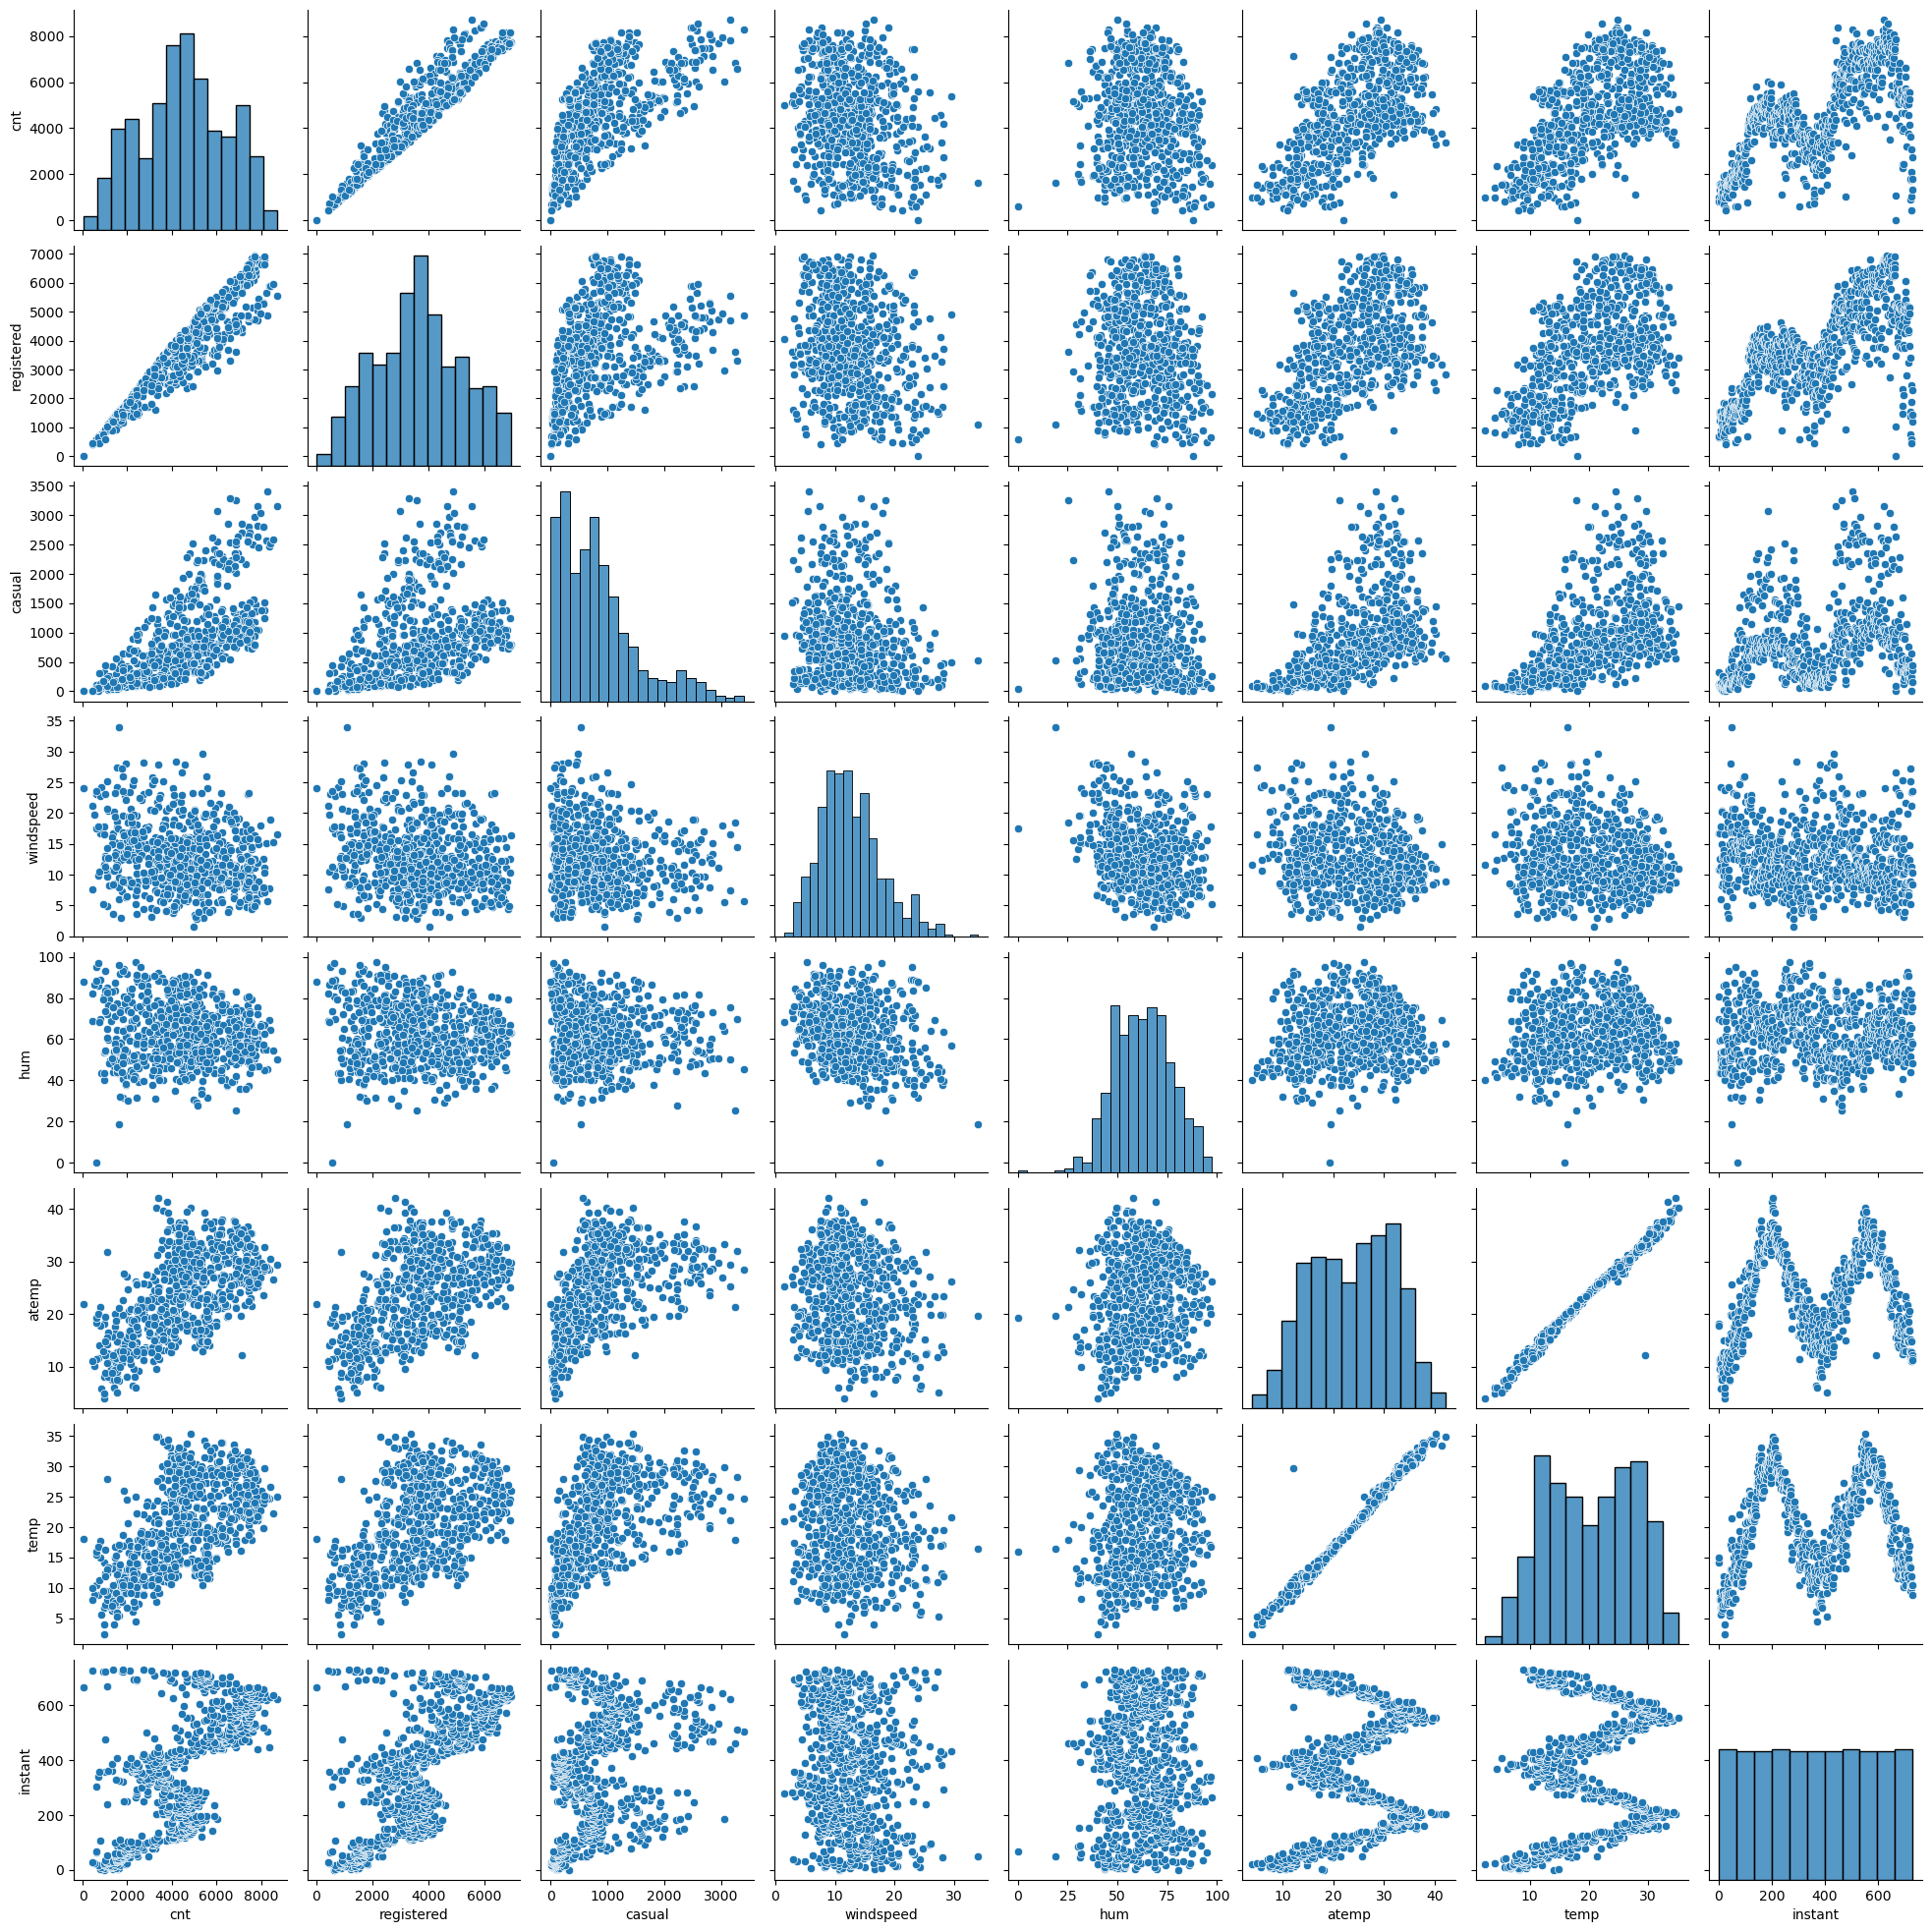

In [215]:
#Visualizing Data set


#Performing visualization on numerical data using pair plot to determine the relationship  between different variables.

sns.pairplot(bikesharing, vars=["cnt","registered","casual","windspeed","hum","atemp","temp","instant"])
plt.show()

In [216]:
#Transforming the data of the variables season, mnth, weathersit, weekday into readable form.

bikesharing['season']=bikesharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikesharing['mnth']=bikesharing.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikesharing['weathersit']=bikesharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikesharing['weekday']=bikesharing.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


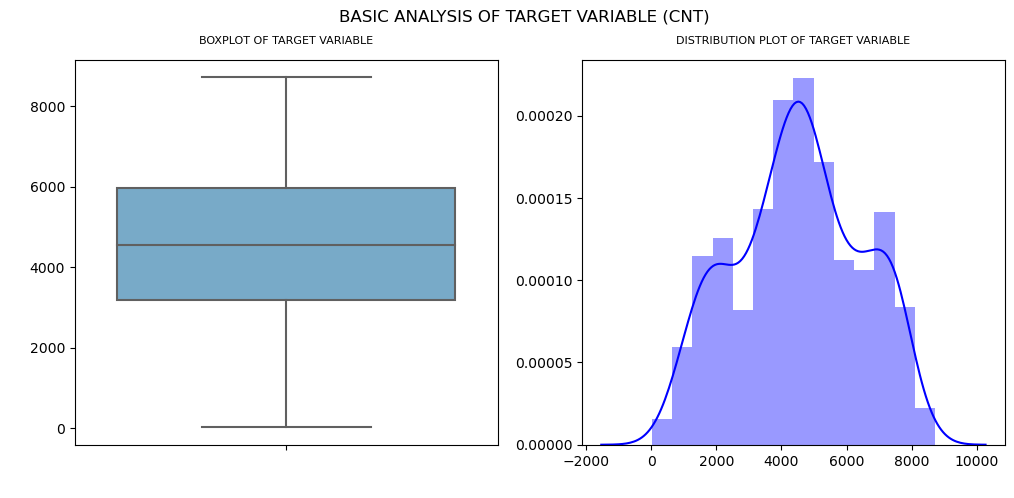

In [217]:
#Univariate Data Analysis on the target variable.

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#Creating main title

fig.suptitle("Basic analysis of target variable (cnt)".upper(), fontsize=12)

#plot 1

sns.boxplot(y=bikesharing['cnt'], ax=ax[0], palette='Blues')
ax[0].set_title("Boxplot of target variable". upper(), fontsize=8,fontweight=20, y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#plot 2

sns.distplot(bikesharing['cnt'], ax=ax[1], color='Blue')
ax[1].set_title("Distribution plot of target variable". upper(), fontsize=8, fontweight=20, y=1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.show()

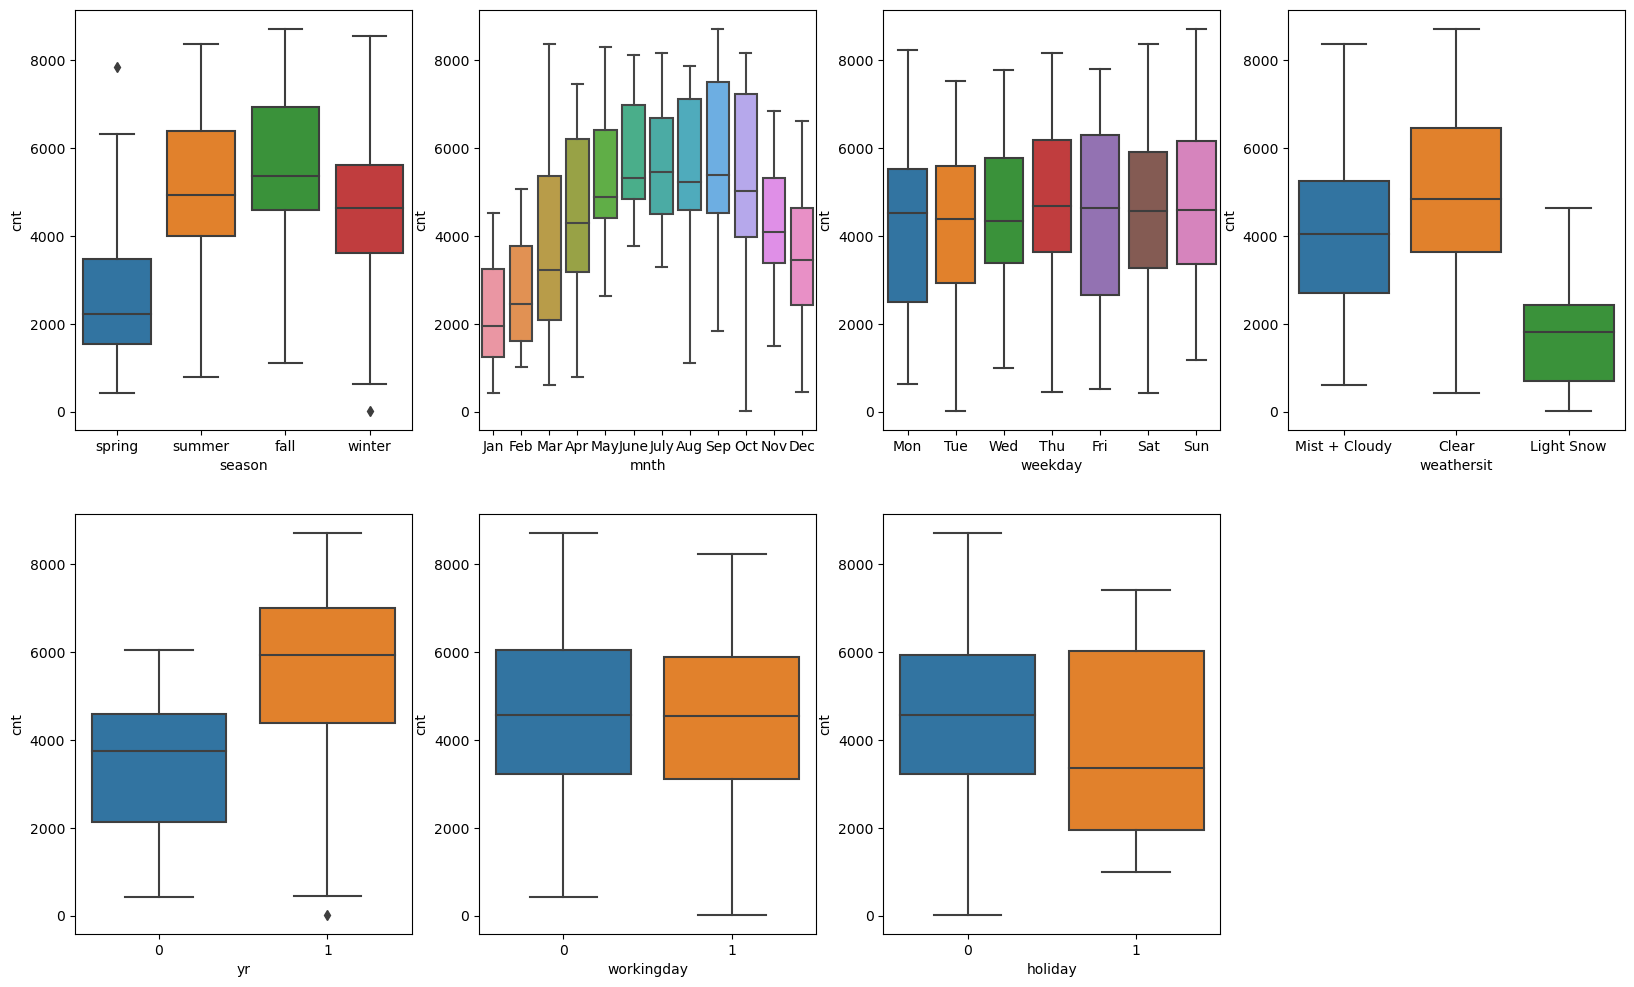

In [218]:
#Box plot for Categorical Data

plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bikesharing)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bikesharing)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bikesharing)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bikesharing)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=bikesharing)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bikesharing)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=bikesharing)
plt.show()


Bivariate Analysis

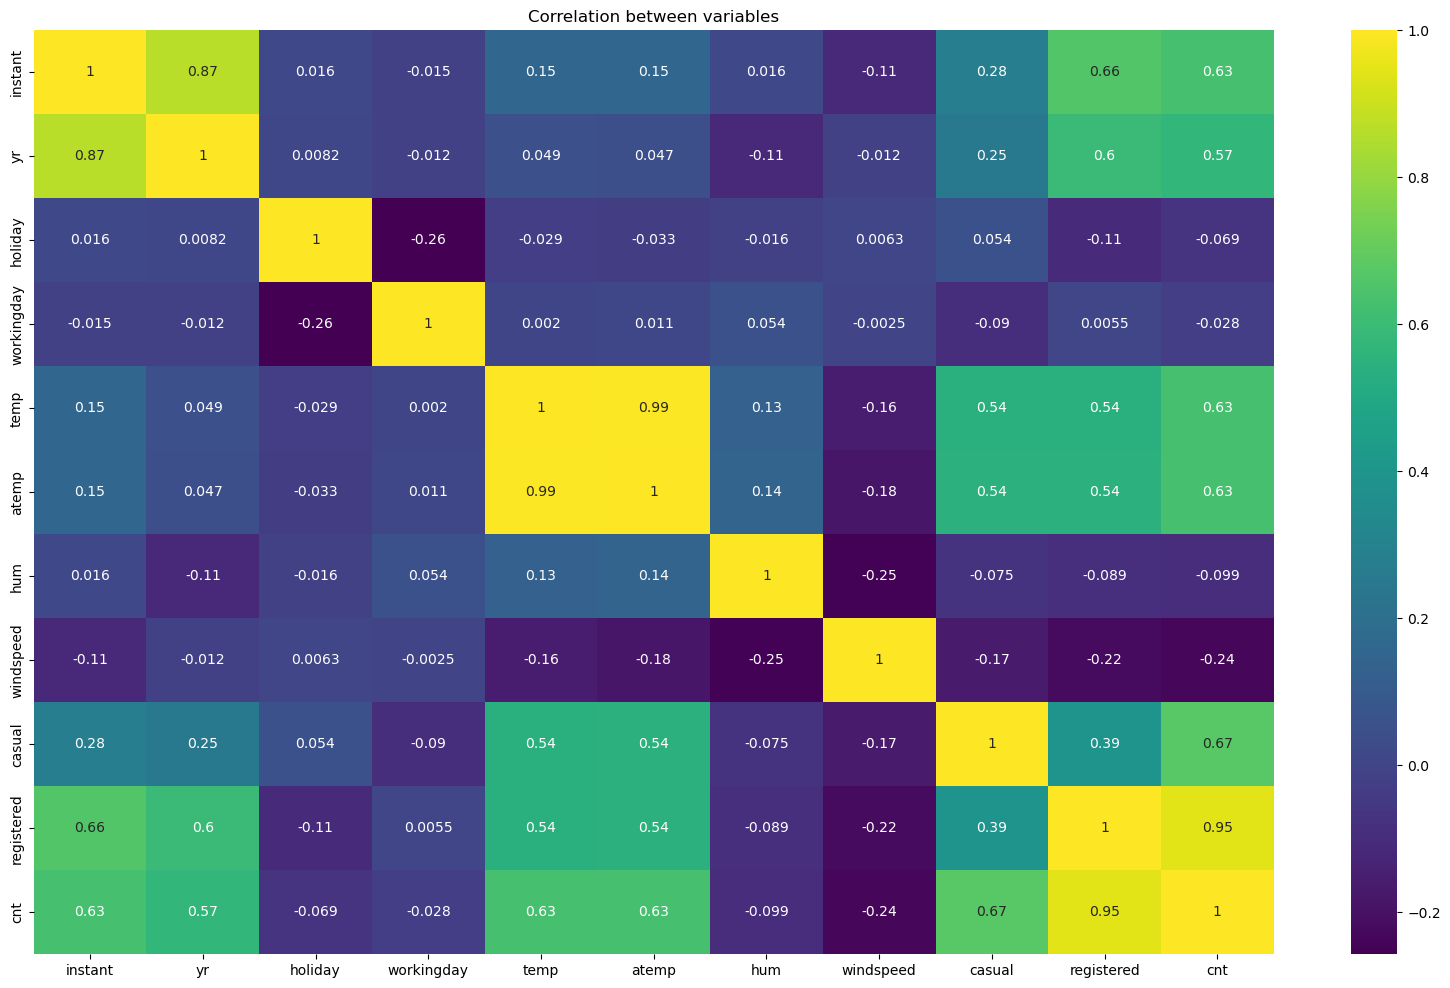

In [219]:
#Heatmap to show correlation between variables

plt.figure(figsize=(20, 12))
sns.heatmap(bikesharing.corr(), cmap='viridis', annot=True)
plt.title('Correlation between variables')
plt.show()

In [220]:
#Creating dummy variables for categorical data

season = pd.get_dummies(bikesharing.season, drop_first=True)
month = pd.get_dummies(bikesharing.mnth, drop_first=True)
weekday = pd.get_dummies(bikesharing.weekday, drop_first=True)
weathersit = pd.get_dummies(bikesharing.weathersit, drop_first=True)

#Concatinate the dummy variables created to the original data

bikesharing = pd.concat([bikesharing,month, weekday, weathersit, season], axis=1)
bikesharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,...,0,0,0,0,0,0,1,1,0,0
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,...,0,0,0,1,0,0,1,1,0,0
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,...,0,0,0,0,1,0,0,1,0,0
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,...,0,0,1,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [221]:
#Dropping 'season','mnth','weekday','weathersit' from the original data

bikesharing.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikesharing.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,1,01-01-2018,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,1,1,0,0
1,2,02-01-2018,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,1,0,0,1,1,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [222]:
# Dropping other irrelevant categorical variables like date and instant from the dataset
bikesharing.drop(columns=['instant','dteday'], inplace=True)

#Dropping atemp since we have a similar variable temp in the data
bikesharing.drop(columns=['atemp'], inplace=True)

#Dropping causal and registered since we can have only one target in the data
bikesharing.drop(columns=['casual','registered'], inplace=True)

bikesharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Step 2: Creating the Train and Test sets

In [223]:
# Splitting the data set into training and testing sets

bikesharing_train, bikesharing_test= train_test_split(bikesharing, train_size=0.7, test_size=0.3, random_state=100)

In [224]:
#shape of train set
bikesharing_train.shape

(510, 29)

In [225]:
#shape of test set
bikesharing_test.shape

(219, 29)

In [226]:
bikesharing_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [227]:
#We see that temp, atemp, hum and windspeed have larger and decimal values compared to others. We can normalize the numbers using the MinMax method and have all the numbers within 0 and 1 range.
#All the values are scaled  to numbers less than or equal to 1
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
bikesharing_train[scaler_var] = scaler.fit_transform(bikesharing_train[scaler_var])

In [228]:
#checking to see if the rescaling has worked

bikesharing_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,0,1,0,1,0


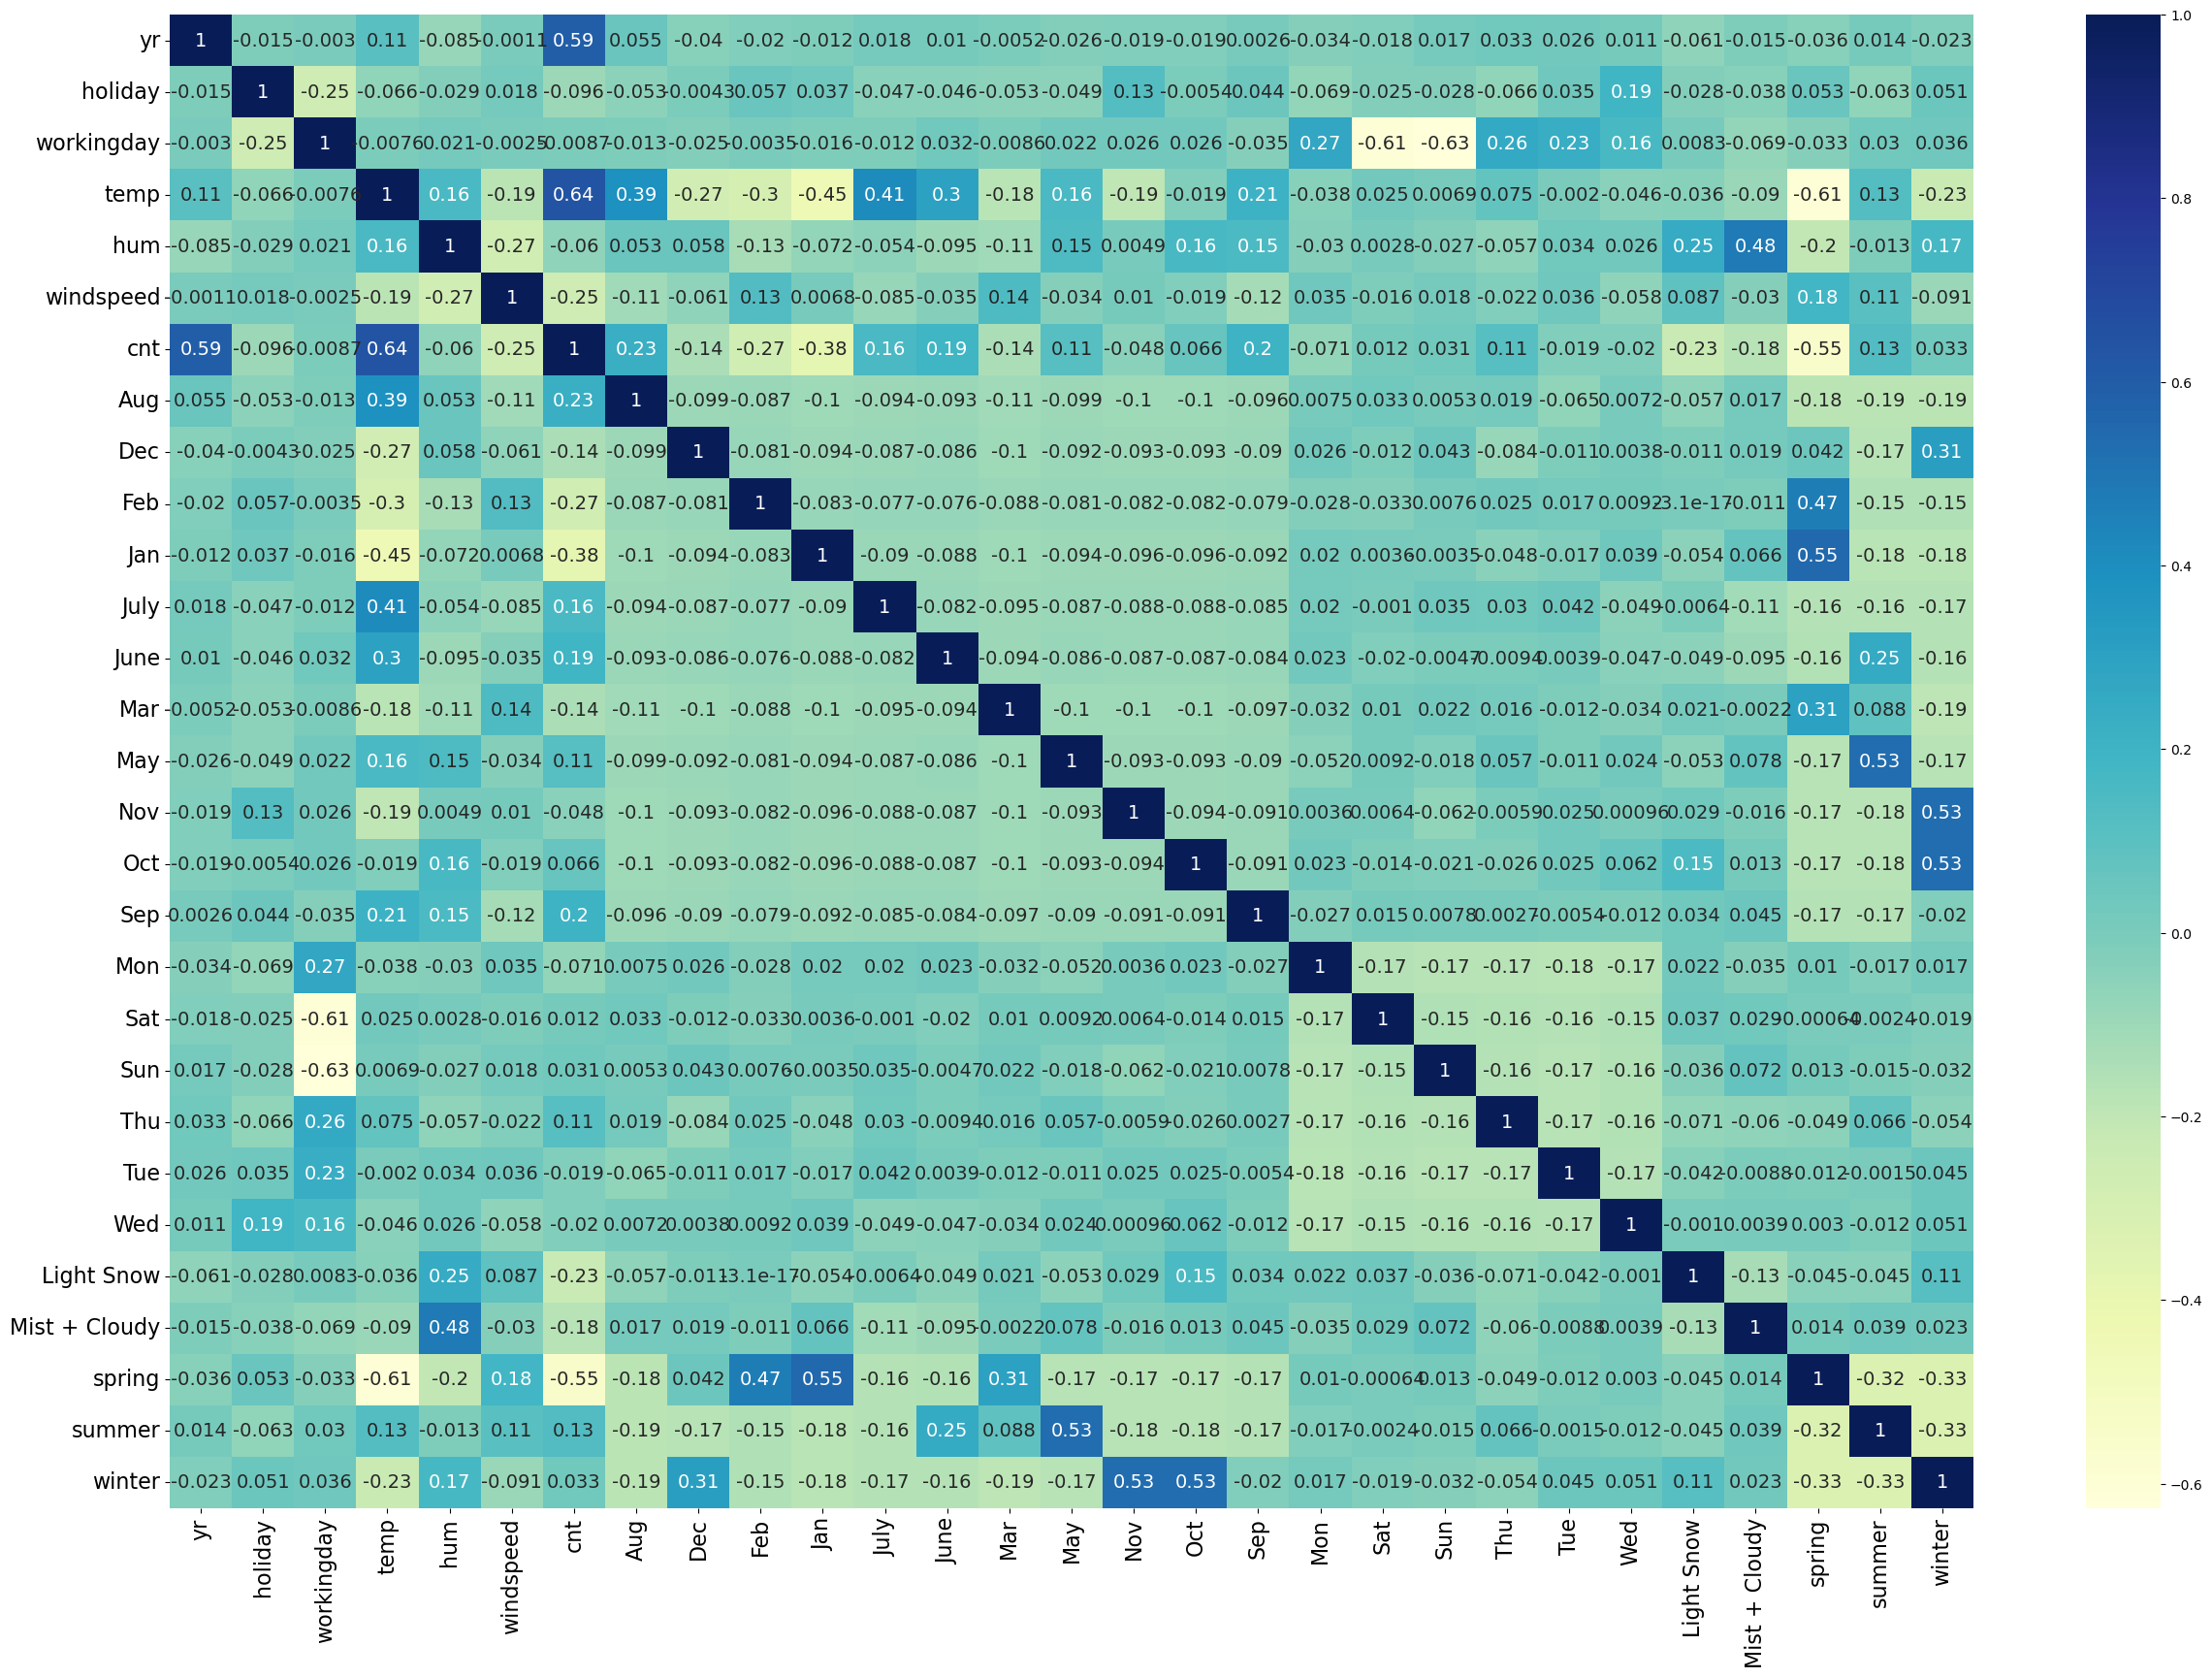

In [229]:
# Checking linearity and correlation using heatmap after rescaling and dummy variable creation

plt.figure(figsize = (30, 20))
sns.heatmap(bikesharing_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

Observations: The count variable is heavily correlated with the temp variable and hence we will do further analysis on this using pairplot

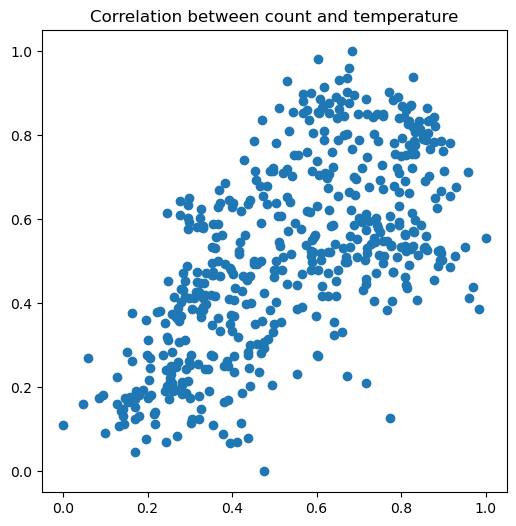

In [230]:
#pairplot of cnt vs temp

plt.figure(figsize=[6,6])
plt.scatter(bikesharing_train.temp, bikesharing_train.cnt)
plt.title('Correlation between count and temperature')
plt.show()

step 3: Training the model

In [231]:
#Creating y train and X train

y_train = bikesharing_train.pop('cnt')
X_train = bikesharing_train

In [232]:
# Adding a constant to X_train

X_train_sm=sm.add_constant(X_train['temp'])
X_train_sm.head()

,const,temp
653,1.0,0.509887
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666


In [233]:
#Fitting the model

lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           5.80e-61
Time:                        18:40:35   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

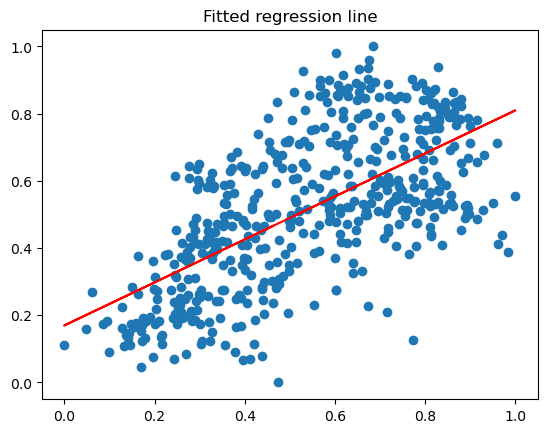

In [234]:
#plotting the regression line

plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1698 + 0.6400*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line')
plt.show()


In [235]:
#Performing Regression on another variable yr which has second best correlation with count to see if the value of R squared increases.


X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)


lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [236]:
#checking summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          9.25e-130
Time:                        18:40:35   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
#Finding the R squared value with all the variables

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          4.33e-179
Time:                        18:40:36   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640      0.000       0.227       0.562
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
Aug               0.0215      0.034      0.632      0.527      -0.045       0.088
Dec              -0.0457      0.034     -1.348      0.178      -0.112       0.021
Feb              -0.0373      0.033     -1.121      0.263      -0.103       0.028
Jan              -0.0636      0.034     -1.880      0.061      -0.130       0.003
July             -0.0349      0.035     -0.985      0.325      -0.105       0.035
June              0.0010      0.025      0.038      0.969      -0.049       0.051
Mar               0.0006      0.025      0.025      0.980      -0.048       0.049
May               0.0241      0.021      1.134      0.257      -0.018       0.066
Nov              -0.0416      0.037     -1.133      0.258      -0.114       0.031
Oct               0.0058      0.036      0.160      0.873      -0.065       0.077
Sep               0.0861      0.032      2.667      0.008       0.023       0.149
Mon              -0.0246      0.015     -1.690      0.092      -0.053       0.004
Sat              -0.0563      0.072     -0.787      0.432      -0.197       0.084
Sun              -0.0500      0.071     -0.699      0.485      -0.190       0.091
Thu               0.0039      0.015      0.258      0.796      -0.026       0.033
Tue              -0.0263      0.015     -1.792      0.074      -0.055       0.003
Wed              -0.0112      0.015     -0.736      0.462      -0.041       0.019
Light Snow       -0.2515      0.027     -9.455      0.000      -0.304      -0.199
Mist + Cloudy    -0.0594      0.011     -5.637      0.000      -0.080      -0.039
spring           -0.0437      0.030     -1.444      0.149      -0.103       0.016
summer            0.0422      0.026      1.598      0.111      -0.010       0.094
winter            0.1109      0.028      3.938      0.000       0.056       0.166
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================================================

In [238]:
#Using RFE(Recursion Feature Elimination) to reduce model complexity by removing variables.
#Using VIF(Variation Inflation Factor) 

lm=LinearRegression()
lm.fit(X_train,y_train)

#setting number of feature variables to 15
rfe=RFE(lm,n_features_to_select=15)

#fitting the RFE Variable
rfe=rfe.fit(X_train,y_train)


In [239]:
#Checking the results after RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [240]:
#Storing the variables in a single variable

rfe_single=X_train.columns[rfe.support_]
rfe_single

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [241]:
#Building model using RFE Variables

#creating training set with RFE selected variables
X_train_rfe= X_train[rfe_single]

#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.34e-189
Time:                        18:40:36   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886      0.000       0.249       0.391
yr                0.2303      0.008     28.511      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp              0.4800      0.037     12.977      0.000       0.407       0.553
hum              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
Dec              -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan              -0.0437      0.018     -2.415      0.016      -0.079      -0.008
July             -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov              -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sep               0.0749      0.017      4.438      0.000       0.042       0.108
Light Snow       -0.2481      0.026     -9.402      0.000      -0.300      -0.196
Mist + Cloudy    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
spring           -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer            0.0408      0.015      2.659      0.008       0.011       0.071
winter            0.1034      0.018      5.763      0.000       0.068       0.139
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
#Checking VIF of model

In [243]:
#Dropping the constant variable
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [244]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1,0


In [245]:
#VIF of the model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Mist + Cloudy,2.32
0,yr,2.09
8,Nov,1.83
6,Jan,1.75


In [246]:
#Dropping the hum variable and rebuilding the model.

X_train_new1 = X_train_rfe.drop(['hum'], axis = 1)

#adding constant
X_train_rfe2 = sm.add_constant(X_train_new1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.57e-186
Time:                        18:40:41   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679      0.000       0.184       0.310
yr                0.2343      0.008     28.709      0.000       0.218       0.250
holiday          -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp              0.4377      0.036     12.083      0.000       0.366       0.509
windspeed        -0.1586      0.025     -6.290      0.000      -0.208      -0.109
Dec              -0.0445      0.018     -2.520      0.012      -0.079      -0.010
Jan              -0.0503      0.018     -2.738      0.006      -0.086      -0.014
July             -0.0504      0.018     -2.725      0.007      -0.087      -0.014
Nov              -0.0419      0.019     -2.198      0.028      -0.079      -0.004
Sep               0.0682      0.017      3.992      0.000       0.035       0.102
Light Snow       -0.2929      0.025    -11.908      0.000      -0.341      -0.245
Mist + Cloudy    -0.0814      0.009     -9.359      0.000      -0.099      -0.064
spring           -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer            0.0333      0.015      2.148      0.032       0.003       0.064
winter            0.0887      0.018      4.951      0.000       0.053       0.124
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe2 = X_train_rfe2.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,yr,2.07
7,Nov,1.80
5,Jan,1.66
6,July,1.59
10,Mist + Cloudy,1.56


In [248]:
#Dropping windspeed

X_train_new3 = X_train_rfe2.drop(['windspeed'], axis = 1)

#adding constant to training variable
X_train_rfe3 = sm.add_constant(X_train_new3)

#creating first training model 
lr = sm.OLS(y_train, X_train_rfe3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.92e-179
Time:                        18:40:42   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1853      0.032      5.832      0.000       0.123       0.248
yr                0.2330      0.008     27.513      0.000       0.216       0.250
holiday          -0.0942      0.027     -3.489      0.001      -0.147      -0.041
temp              0.4614      0.037     12.337      0.000       0.388       0.535
Dec              -0.0349      0.018     -1.910      0.057      -0.071       0.001
Jan              -0.0336      0.019     -1.781      0.076      -0.071       0.003
July             -0.0515      0.019     -2.683      0.008      -0.089      -0.014
Nov              -0.0439      0.020     -2.220      0.027      -0.083      -0.005
Sep               0.0734      0.018      4.145      0.000       0.039       0.108
Light Snow       -0.3071      0.025    -12.079      0.000      -0.357      -0.257
Mist + Cloudy    -0.0800      0.009     -8.860      0.000      -0.098      -0.062
spring           -0.0834      0.022     -3.756      0.000      -0.127      -0.040
summer            0.0250      0.016      1.561      0.119      -0.006       0.057
winter            0.0920      0.019      4.949      0.000       0.055       0.128
==============================================================================
Omnibus:                       77.233   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.024
Skew:                          -0.742   Prob(JB):                     1.50e-46
Kurtosis:                       5.780   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe3 = X_train_rfe3.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.30
12,winter,2.79
10,spring,2.12
0,yr,2.07
11,summer,1.93
6,Nov,1.78
4,Jan,1.65
5,July,1.59
9,Mist + Cloudy,1.56
3,Dec,1.46


In [250]:
#Dropping summer

X_train_new4 = X_train_rfe3.drop(['summer'], axis = 1)

#adding constant to training variable
X_train_rfe4 = sm.add_constant(X_train_new4)

#creating first training model 
lr = sm.OLS(y_train, X_train_rfe4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          4.48e-180
Time:                        18:40:43   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2190      0.023      9.374      0.000       0.173       0.265
yr                0.2334      0.008     27.535      0.000       0.217       0.250
holiday          -0.0937      0.027     -3.465      0.001      -0.147      -0.041
temp              0.4343      0.033     13.089      0.000       0.369       0.499
Dec              -0.0400      0.018     -2.222      0.027      -0.075      -0.005
Jan              -0.0380      0.019     -2.035      0.042      -0.075      -0.001
July             -0.0620      0.018     -3.450      0.001      -0.097      -0.027
Nov              -0.0491      0.020     -2.518      0.012      -0.087      -0.011
Sep               0.0623      0.016      3.836      0.000       0.030       0.094
Light Snow       -0.3083      0.025    -12.114      0.000      -0.358      -0.258
Mist + Cloudy    -0.0798      0.009     -8.830      0.000      -0.098      -0.062
spring           -0.1072      0.016     -6.624      0.000      -0.139      -0.075
winter            0.0740      0.015      5.068      0.000       0.045       0.103
==============================================================================
Omnibus:                       78.587   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.903
Skew:                          -0.741   Prob(JB):                     2.40e-49
Kurtosis:                       5.888   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
#checking the VIF of the model 

#dropping the constant variables

X_train_rfe4 = X_train_rfe4.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.04
11,winter,2.51
0,yr,2.05
10,spring,1.93
6,Nov,1.78
4,Jan,1.65
9,Mist + Cloudy,1.52
3,Dec,1.46
5,July,1.34
7,Sep,1.20


In [252]:
#Dropping november because of it's high VIF and p value



X_train_new5 = X_train_rfe4.drop(['Nov'], axis = 1)

#adding constant to training variable
X_train_rfe5 = sm.add_constant(X_train_new5)

#creating first training model 
lr = sm.OLS(y_train, X_train_rfe5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          6.93e-180
Time:                        18:40:44   Log-Likelihood:                 481.52
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     498   BIC:                            -888.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2064      0.023      8.997      0.000       0.161       0.251
yr                0.2334      0.009     27.384      0.000       0.217       0.250
holiday          -0.1019      0.027     -3.774      0.000      -0.155      -0.049
temp              0.4518      0.033     13.852      0.000       0.388       0.516
Dec              -0.0229      0.017     -1.366      0.173      -0.056       0.010
Jan              -0.0329      0.019     -1.762      0.079      -0.070       0.004
July             -0.0648      0.018     -3.591      0.000      -0.100      -0.029
Sep               0.0662      0.016      4.072      0.000       0.034       0.098
Light Snow       -0.3039      0.026    -11.904      0.000      -0.354      -0.254
Mist + Cloudy    -0.0789      0.009     -8.685      0.000      -0.097      -0.061
spring           -0.1035      0.016     -6.389      0.000      -0.135      -0.072
winter            0.0571      0.013      4.381      0.000       0.031       0.083
==============================================================================
Omnibus:                       70.858   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.111
Skew:                          -0.695   Prob(JB):                     3.86e-41
Kurtosis:                       5.613   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
#checking the VIF of the model 

#dropping the constant variables

X_train_rfe5 = X_train_rfe5.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.03
0,yr,2.05
9,spring,1.92
4,Jan,1.64
10,winter,1.57
8,Mist + Cloudy,1.52
5,July,1.34
3,Dec,1.29
6,Sep,1.19
7,Light Snow,1.07


In [254]:
#Dropping Dec because of it's high VIF and p value



X_train_new6 = X_train_rfe5.drop(['Dec'], axis = 1)

#adding constant to training variable
X_train_rfe6 = sm.add_constant(X_train_new6)

#creating first training model 
lr = sm.OLS(y_train, X_train_rfe6)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.12e-180
Time:                        18:40:45   Log-Likelihood:                 480.56
No. Observations:                 510   AIC:                            -939.1
Df Residuals:                     499   BIC:                            -892.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2006      0.023      8.890      0.000       0.156       0.245
yr                0.2335      0.009     27.373      0.000       0.217       0.250
holiday          -0.1007      0.027     -3.728      0.000      -0.154      -0.048
temp              0.4602      0.032     14.352      0.000       0.397       0.523
Jan              -0.0280      0.018     -1.527      0.127      -0.064       0.008
July             -0.0664      0.018     -3.680      0.000      -0.102      -0.031
Sep               0.0667      0.016      4.103      0.000       0.035       0.099
Light Snow       -0.3016      0.025    -11.831      0.000      -0.352      -0.252
Mist + Cloudy    -0.0789      0.009     -8.677      0.000      -0.097      -0.061
spring           -0.1045      0.016     -6.452      0.000      -0.136      -0.073
winter            0.0535      0.013      4.187      0.000       0.028       0.079
==============================================================================
Omnibus:                       68.591   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.062
Skew:                          -0.679   Prob(JB):                     3.56e-39
Kurtosis:                       5.548   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
#checking the VIF of the model 

#dropping the constant variables

X_train_rfe6 = X_train_rfe6.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.03
0,yr,2.05
8,spring,1.81
3,Jan,1.60
7,Mist + Cloudy,1.52
4,July,1.34
9,winter,1.33
5,Sep,1.19
6,Light Snow,1.06
1,holiday,1.04


In [256]:
#Dropping Jan because of it's high VIF and p value



X_train_new7 = X_train_rfe6.drop(['Jan'], axis = 1)

#adding constant to training variable
X_train_rfe7 = sm.add_constant(X_train_new7)

#creating first training model 
lr = sm.OLS(y_train, X_train_rfe7)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.16e-181
Time:                        18:40:46   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1938      0.022      8.750      0.000       0.150       0.237
yr                0.2330      0.009     27.300      0.000       0.216       0.250
holiday          -0.1011      0.027     -3.740      0.000      -0.154      -0.048
temp              0.4712      0.031     15.063      0.000       0.410       0.533
July             -0.0688      0.018     -3.824      0.000      -0.104      -0.033
Sep               0.0658      0.016      4.042      0.000       0.034       0.098
Light Snow       -0.3002      0.026    -11.768      0.000      -0.350      -0.250
Mist + Cloudy    -0.0796      0.009     -8.752      0.000      -0.097      -0.062
spring           -0.1107      0.016     -7.051      0.000      -0.142      -0.080
winter            0.0558      0.013      4.393      0.000       0.031       0.081
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
#checking the VIF of the model 

#dropping the constant variables

X_train_rfe7 = X_train_rfe7.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
6,Mist + Cloudy,1.51
3,July,1.33
8,winter,1.33
7,spring,1.25
4,Sep,1.19
5,Light Snow,1.06
1,holiday,1.04


Step 4: Residual Analysis

In [258]:
X_train_rfe7 = sm.add_constant(X_train_rfe7)

X_train_rfe7

,const,yr,holiday,temp,July,Sep,Light Snow,Mist + Cloudy,spring,winter
653,1.0,1,0,0.509887,0,0,0,0,0,1
576,1.0,1,0,0.815169,1,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,1,1,0
728,1.0,1,0,0.245101,0,0,0,0,1,0
482,1.0,1,0,0.395666,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0,0,0,1,0,0
578,1.0,1,0,0.863973,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,1,0
350,1.0,0,0,0.248216,0,0,0,1,0,1


In [259]:
#getting the y_train_pred

y_train_pred = lr_model.predict(X_train_rfe7)

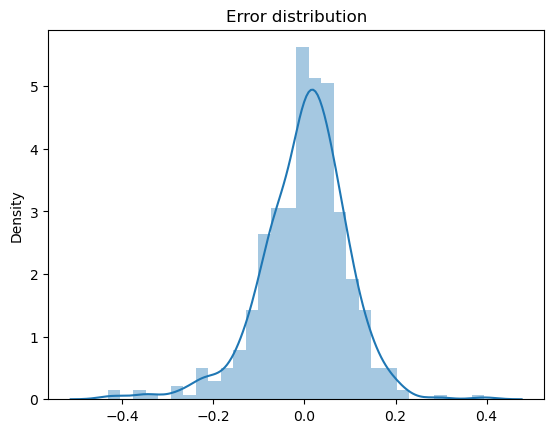

In [260]:
res = y_train - y_train_pred

#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [261]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.16e-181
Time:                        18:40:51   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1938      0.022      8.750      0.000       0.150       0.237
yr                0.2330      0.009     27.300      0.000       0.216       0.250
holiday          -0.1011      0.027     -3.740      0.000      -0.154      -0.048
temp              0.4712      0.031     15.063      0.000       0.410       0.533
July             -0.0688      0.018     -3.824      0.000      -0.104      -0.033
Sep               0.0658      0.016      4.042      0.000       0.034       0.098
Light Snow       -0.3002      0.026    -11.768      0.000      -0.350      -0.250
Mist + Cloudy    -0.0796      0.009     -8.752      0.000      -0.097      -0.062
spring           -0.1107      0.016     -7.051      0.000      -0.142      -0.080
winter            0.0558      0.013      4.393      0.000       0.031       0.081
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
y_train_pred = lr_model.predict(X_train_rfe7)
res = y_train - y_train_pred


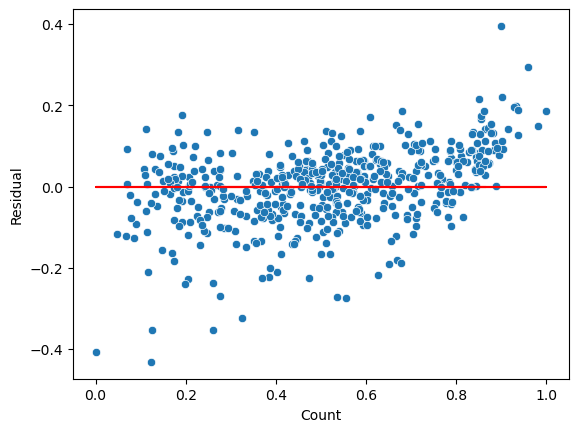

In [263]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [264]:
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
6,Mist + Cloudy,1.51
3,July,1.33
8,winter,1.33
7,spring,1.25
4,Sep,1.19
5,Light Snow,1.06
1,holiday,1.04


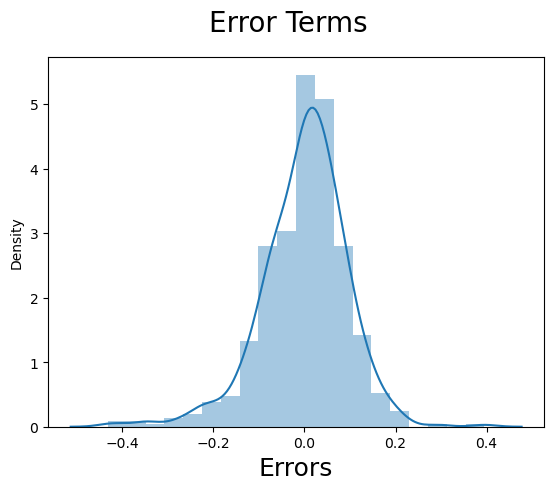

In [265]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [266]:
#Making predictions on the Test set

#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [267]:
#perform scaling on test data set

#test dataset is transformed based on fit of train dataset
#train dataset is to be fit, test dataset is not fit but simply transformed

bikesharing_test[scaler_var] = scaler.transform(bikesharing_test[scaler_var])

bikesharing_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
# Splitting target and feature variables

y_test = bikesharing_test.pop('cnt')
X_test = bikesharing_test[:]

In [269]:
#Printing feature variables

X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'July', 'Sep', 'Light Snow',
       'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

In [270]:
#Dropping the constant variable

X_train_rfe7.drop(columns='const', inplace=True)

In [271]:
#creating new X_test dataset
X_test_new = X_test[X_train_rfe7.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [272]:
#making predictions

y_pred = lr_model.predict(X_test_new)

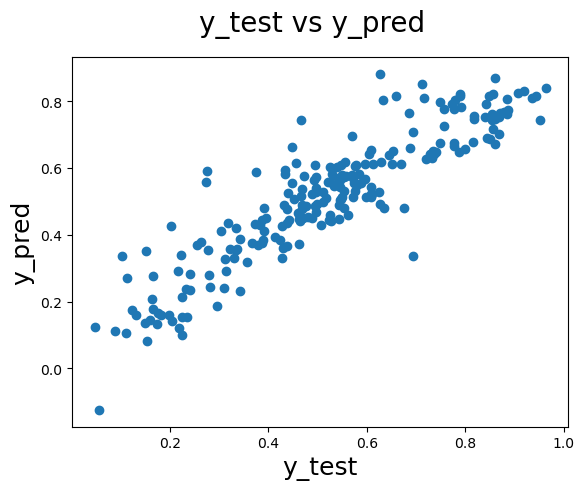

In [273]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18)
plt.show()

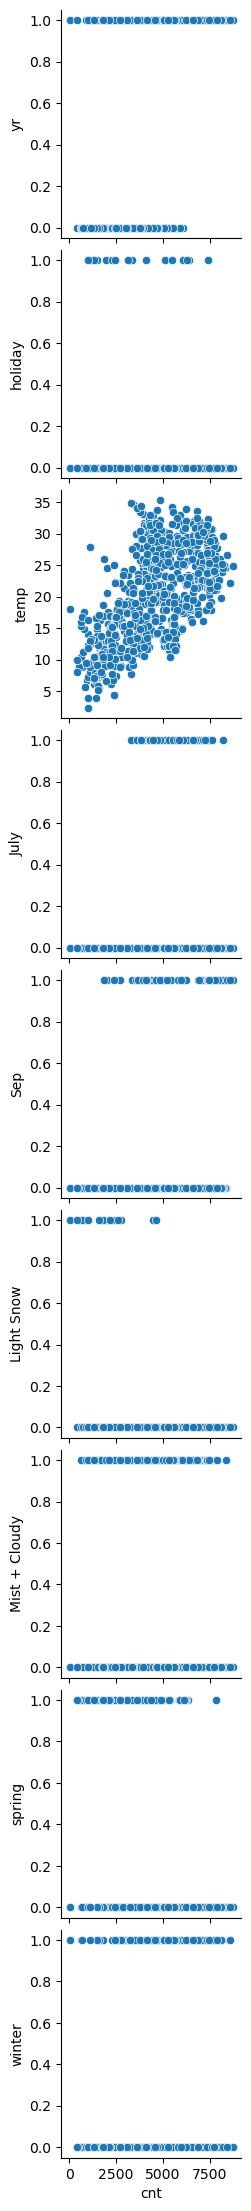

<Figure size 1600x1200 with 0 Axes>

In [274]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(bikesharing, y_vars=X_train_rfe7.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

In [275]:
#r squared value of train set

r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r squared value of the train set is', r2_train)

r squared value of the train set is 0.8225173906649428


In [276]:
#r squared value on test set

r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r square  value of test set is', r2_test)

r square  value of test set is 0.8092200832884748


In [277]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008934993366382342
Mean squared error of the test set is 0.009061246323057638
